# Pandas walk-through: Federal Election Commission dataset

This walk-through is adapted from Chapter 14.5 of Wes McKinney's book, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (3rd edition).

In [1]:
%matplotlib inline
import pandas as pd
print(pd.__version__)

0.23.4


# Setup

The following code cell imports a local Python module (stored in `cse6040utils.py`) and uses one of its utility functions to open the sample dataset.

> Note: Due to the size of the data file, we are not making it available for download. You will need to run this notebook on Vocareum.

In [2]:
from cse6040utils import download_dataset
local_data = download_dataset({'P00000001-ALL.csv': '31df639d0b5dbd3b6d755f91d6bf6fb4'}, vocareum_only=True)

'./resource/asnlib/publicdata/P00000001-ALL.csv' is ready!


# Initial exploration and clean-up

In [3]:
# Load CSV file
fecdata = pd.read_csv(local_data['P00000001-ALL.csv'])
fecdata.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [4]:
fecdata.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [5]:
fecdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


Get a random sample:

In [6]:
fecdata.sample(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
496548,C00431445,P80003338,"Obama, Barack","LENTZ, ERIC",RENO,NV,89502,CARDMI CENTRIX,ENGINEER,212.0,27-SEP-11,NaN,NaN,NaN,SA17A,756218
545276,C00431445,P80003338,"Obama, Barack","TROWBRIDGE, JAMIE",NEW YORK,NY,100034632,"TIERRA INNOVATION, INC.",CEO,50.0,31-MAR-12,NaN,NaN,NaN,SA17A,780234
919979,C00496067,P00003608,"Cain, Herman","CRAWFORD, JOSEPH V. MR.",LEANDER,TX,786411677,SELF EMPLOYED,ATTORNEY,25.0,18-NOV-11,NaN,NaN,NaN,SA17A,776884
140731,C00431445,P80003338,"Obama, Barack","SCOTT, SHARON E.",PARADISE,CA,959693707,NOT EMPLOYED,RETIRED,100.0,31-MAR-12,NaN,NaN,NaN,SA17A,780234
905313,C00496067,P00003608,"Cain, Herman","WALKER, BRANDON",CLOVIS,CA,9.36198e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,17-OCT-11,NaN,NaN,NaN,SA17A,776884


Summarize numerical data (`.describe()`):

In [7]:
fecdata.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


Get a list of the unique candidates (`unique_candidates`):

In [8]:
unique_candidates = fecdata['cand_nm'].unique()
unique_candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Assign party affiliations (they are all Republicans except for Barack Obama):

In [9]:
party_affiliations = {name: 'D' if name == 'Obama, Barack' else 'R' for name in unique_candidates}
party_affiliations

{'Bachmann, Michelle': 'R',
 'Romney, Mitt': 'R',
 'Obama, Barack': 'D',
 "Roemer, Charles E. 'Buddy' III": 'R',
 'Pawlenty, Timothy': 'R',
 'Johnson, Gary Earl': 'R',
 'Paul, Ron': 'R',
 'Santorum, Rick': 'R',
 'Cain, Herman': 'R',
 'Gingrich, Newt': 'R',
 'McCotter, Thaddeus G': 'R',
 'Huntsman, Jon': 'R',
 'Perry, Rick': 'R'}

In [10]:
aff = {name: "D" if name == "Obama, Barack" else "R" for name in unique_candidates}
aff

{'Bachmann, Michelle': 'R',
 'Romney, Mitt': 'R',
 'Obama, Barack': 'D',
 "Roemer, Charles E. 'Buddy' III": 'R',
 'Pawlenty, Timothy': 'R',
 'Johnson, Gary Earl': 'R',
 'Paul, Ron': 'R',
 'Santorum, Rick': 'R',
 'Cain, Herman': 'R',
 'Gingrich, Newt': 'R',
 'McCotter, Thaddeus G': 'R',
 'Huntsman, Jon': 'R',
 'Perry, Rick': 'R'}

In [11]:
candidate_sample = fecdata['cand_nm'].sample(5)
candidate_sample

383773     Obama, Barack
926454    Gingrich, Newt
941087    Gingrich, Newt
438185     Obama, Barack
957848    Gingrich, Newt
Name: cand_nm, dtype: object

In [12]:
candidate_sample.map(party_affiliations)

383773    D
926454    R
941087    R
438185    D
957848    R
Name: cand_nm, dtype: object

In [13]:
fecdata['party'] = fecdata['cand_nm'].map(party_affiliations)

In [14]:
fecdata.sample(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
128259,C00431445,P80003338,"Obama, Barack","NOVAK, LAURA A",OAKLAND,CA,946111937,SELF-EMPLOYED,WRITER,250.0,22-APR-12,NaN,NaN,NaN,SA17A,785239,D
42049,C00431171,P80003353,"Romney, Mitt","NEWBERGER, TODD MR.",WILMETTE,IL,600913210,SELF-EMPLOYED,PHILOSOPHER,2500.0,24-APR-12,NaN,NaN,NaN,SA17A,785689,R
453052,C00431445,P80003338,"Obama, Barack","JOHNSON, MARY",RED LODGE,MT,590681328,RETIRED,RETIRED,75.0,25-FEB-12,NaN,NaN,NaN,SA17A,787803,D
524548,C00431445,P80003338,"Obama, Barack","BERGGRUEN, OLIVER",NEW YORK,NY,100656141,SELF-EMPLOYED,ART HISTORIAN,2500.0,15-FEB-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,787803,D
376538,C00431445,P80003338,"Obama, Barack","RIDORE, MARIE",STONEHAM,MA,21803531,PARTNERS HEALTH CARE SYSTEM,SR. BILLING SPECIALIST,10.0,05-APR-12,NaN,NaN,NaN,SA17A,785239,D


# Total contributions by party and candidate

What was the total amount of contributions (in millions of dollars)?

In [15]:
fecdata['contb_receipt_amt'].sum()*1e-6 # millions of dollars

298.75139514000006

Which **party** got more individual donations (transactions, not total dollars)?

In [16]:
fecdata['party'].value_counts()

D    593746
R    407985
Name: party, dtype: int64

Which party got more total dollars?

In [17]:
fecdata.groupby('party')['contb_receipt_amt'].sum()*1e-6

party
D    133.502591
R    165.248804
Name: contb_receipt_amt, dtype: float64

Filter all the data to include only the two main candidates, Romney and Obama.

In [18]:
keep_candidates = {'Obama, Barack', 'Romney, Mitt'}

In [19]:
matches = fecdata['cand_nm'].apply(lambda x: x in keep_candidates)
fecdata[matches].shape

(700975, 17)

In [20]:
fecmain = fecdata[fecdata['cand_nm'].isin(keep_candidates)].copy()
print(fecmain['cand_nm'].unique())
display(fecmain.sample(5))
display(fecmain.groupby('cand_nm')['contb_receipt_amt'].sum()*1e-6)

['Romney, Mitt' 'Obama, Barack']


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
667371,C00431445,P80003338,"Obama, Barack","BOYNTON, JUDITH",HYDE PARK,VT,56559045,SELF EMPLOYED,ARTIST,2500.0,27-JUN-11,NaN,X,* OBAMA VICTORY FUND 2012,SA18,756214,D
638073,C00431445,P80003338,"Obama, Barack","SHAPPELL, MICHAEL",LONGVIEW,TX,756042646,YOURTEACHER.COM,DIRECTOR OF TECHNOLOGY,35.0,19-APR-12,NaN,NaN,NaN,SA17A,785239,D
440930,C00431445,P80003338,"Obama, Barack","LONG, SHARON",MINNEAPOLIS,MN,554143678,URBAN INSTITUTE,ECONOMIST,20.0,21-FEB-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,787803,D
273634,C00431445,P80003338,"Obama, Barack","GREEN, GARY",SUMMERFIELD,FL,344911611,RETIRED,RETIRED,20.0,11-DEC-11,NaN,X,* OBAMA VICTORY FUND 2012,SA18,772372,D
673483,C00431445,P80003338,"Obama, Barack","RUIZ, RAFAEL",SEATTLE,WA,981034533,MICROSOFT,SOFTWARE ENGINEER,50.0,19-APR-12,NaN,NaN,NaN,SA17A,785239,D


cand_nm
Obama, Barack    133.502591
Romney, Mitt      85.219249
Name: contb_receipt_amt, dtype: float64

# Who contributes?

Get a list of top occupations:

In [21]:
len(fecmain['contbr_occupation'].unique())

33606

In [22]:
fecmain['contbr_occupation'].value_counts()

RETIRED                                   177897
ATTORNEY                                   30219
INFORMATION REQUESTED                      24785
HOMEMAKER                                  19742
PHYSICIAN                                  17259
INFORMATION REQUESTED PER BEST EFFORTS     12647
PROFESSOR                                  11812
TEACHER                                    11517
CONSULTANT                                 10092
NOT EMPLOYED                                9710
LAWYER                                      7454
ENGINEER                                    6119
PRESIDENT                                   4918
MANAGER                                     4759
WRITER                                      4447
SELF-EMPLOYED                               3786
SALES                                       3706
EXECUTIVE                                   3654
OWNER                                       3430
EDUCATOR                                    3361
STUDENT             

Replace synonyms: (also: `dict.get()`)

In [23]:
occ_mapping = {'INFORMATION REQUESTED': 'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
               'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
               'C.E.O.': 'CEO'}

In [24]:
fecmain['contbr_occupation'].map(occ_mapping)

411                NaN
412                NaN
413                NaN
414                NaN
415                NaN
416                NaN
417                NaN
418                NaN
419                NaN
420                NaN
421                NaN
422                NaN
423                NaN
424                NaN
425                NaN
426                NaN
427                NaN
428       NOT PROVIDED
429                NaN
430                NaN
431                NaN
432                NaN
433                NaN
434                NaN
435                NaN
436                NaN
437                NaN
438                NaN
439       NOT PROVIDED
440                NaN
              ...     
701356             NaN
701357             NaN
701358             NaN
701359             NaN
701360             NaN
701361             NaN
701362             NaN
701363             NaN
701364             NaN
701365             NaN
701366             NaN
701367             NaN
701368    N

In [25]:
# .get()!
print(occ_mapping.get('PROFESSOR'))
print(occ_mapping.get('PROFESSOR', 'PROFESSOR'))

None
PROFESSOR


In [26]:
fecmain['contbr_occupation'] = fecmain['contbr_occupation'].map(lambda x: occ_mapping.get(x, x))

In [27]:
fecmain['contbr_occupation']

411                     FOREIGN SERVICE OFFICER
412                     FOREIGN SERVICE OFFICER
413                        INTELLIGENCE ANALYST
414                                    ENGINEER
415                   COMPUTER SYSTEMS ENGINEER
416                     FOREIGN SERVICE OFFICER
417                            MILITARY OFFICER
418                   COMPUTER SYSTEMS ENGINEER
419                            MILITARY OFFICER
420                                    ENGINEER
421                                      SECRET
422                                      SECRET
423                               MEDIA ANALYST
424                                    MILITARY
425                                    ENGINEER
426                                    ENGINEER
427                                    ATTORNEY
428                                NOT PROVIDED
429                                    ATTORNEY
430                                     RETIRED
431                                     

Synonymous employer mappings:

In [28]:
emp_mapping = occ_mapping.copy()
emp_mapping['SELF'] = 'SELF-EMPLOYED'
emp_mapping['SELF EMPLOYED'] = 'SELF-EMPLOYED'
emp_mapping

{'INFORMATION REQUESTED': 'NOT PROVIDED',
 'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
 'C.E.O.': 'CEO',
 'SELF': 'SELF-EMPLOYED',
 'SELF EMPLOYED': 'SELF-EMPLOYED'}

In [29]:
fecmain['contbr_employer'] = fecmain['contbr_employer'].map(lambda x: emp_mapping.get(x, x))

In [30]:
emp_mapping.get('prof','pro')

'pro'

Create a "pivot table" that shows occupations as rows and party affiliation as columns, summing the individual contributions.

In [31]:
by_occ = fecmain.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occ

party,D,R
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.00,NaN
AREA VICE PRESIDENT,250.00,NaN
RESEARCH ASSOCIATE,100.00,NaN
TEACHER,500.00,NaN
THERAPIST,3900.00,NaN
-,5000.00,NaN
.NET PROGRAMMER,481.00,NaN
07/13/1972,98.00,NaN
12K ADVOCATE,150.00,NaN


Determine which occupations account for $1 million or more in contributions. Compare the amounts between the two party affiliations. (Bonus: Make a plot to compare these visually.)

In [32]:
over_1mil = by_occ[by_occ.sum(axis=1) > 1e6]*1e-6
len(over_1mil)

25

In [33]:
over_1mil

party,D,R
contbr_occupation,,
ATTORNEY,11.126933,5.302579
BANKER,0.224084,0.993536
BUSINESS OWNER,0.449979,0.601530
CEO,2.071475,2.247242
CHAIRMAN,0.495547,0.752587
CONSULTANT,2.459813,1.404577
ENGINEER,0.950426,0.317249
EXECUTIVE,1.355161,2.230654
FINANCE,0.294031,1.118567


In [34]:
sorted_occ = over_1mil.sum(axis=1).sort_values()

In [35]:
over_1mil.sum(axis=1).sort_values()

contbr_occupation
BUSINESS OWNER     1.051509
STUDENT            1.116193
WRITER             1.174452
BANKER             1.217621
CHAIRMAN           1.248134
ENGINEER           1.267675
MANAGER            1.328519
TEACHER            1.389808
FINANCE            1.412599
REAL ESTATE        1.562648
NOT EMPLOYED       1.708108
SELF-EMPLOYED      1.731132
OWNER              1.844263
PROFESSOR          2.323933
INVESTOR           2.378858
LAWYER             3.167097
EXECUTIVE          3.585815
CONSULTANT         3.864390
PRESIDENT          4.281450
CEO                4.318717
PHYSICIAN          5.065384
HOMEMAKER         12.280645
NOT PROVIDED      16.023177
ATTORNEY          16.429512
RETIRED           36.537456
dtype: float64

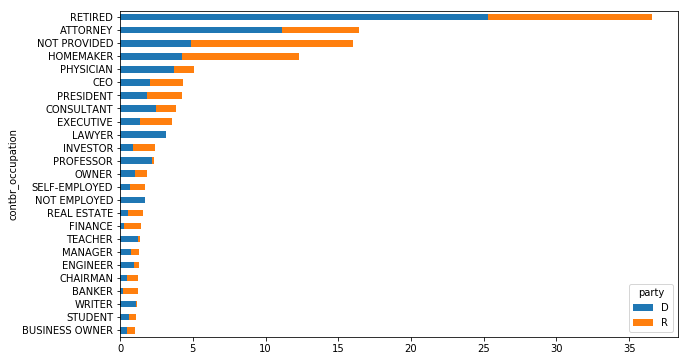

In [36]:
over_1mil_sorted = over_1mil.loc[sorted_occ.index]
over_1mil_sorted.plot(kind='barh', stacked=True, figsize=(10, 6));

# Simple ranking

Determine largest donors:

In [37]:
largest_donors = fecmain['contb_receipt_amt'].nlargest(7)
largest_donors

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
Name: contb_receipt_amt, dtype: float64

In [38]:
fecmain.loc[largest_donors.index]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
325136,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,2014490.51,29-FEB-12,NaN,X,*,SA18,787803,D
326651,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,31-DEC-11,NaN,X,*,SA18,772372,D
344539,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1679114.65,31-MAR-12,NaN,X,*,SA18,780234,D
344419,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1511192.17,30-SEP-11,NaN,X,*,SA18,756218,D
319478,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,526246.17,30-APR-12,NaN,X,*,SA18,785239,D
335187,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,512710.91,31-JAN-12,NaN,X,*,SA18,775668,D
257270,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,WASHINGTON,DC,20003,NaN,NaN,451726.00,30-JUN-11,NaN,X,*,SA18,756214,D


Display largest donors, grouped by candidate:

In [39]:
grouped = fecmain.groupby('cand_nm')
grouped['contb_receipt_amt'].nlargest(3)

cand_nm              
Obama, Barack  325136    2014490.51
               326651    1944042.43
               344539    1679114.65
Romney, Mitt   65131       12700.00
               41888       10000.00
               90076       10000.00
Name: contb_receipt_amt, dtype: float64

In [40]:
type(grouped)

pandas.core.groupby.groupby.DataFrameGroupBy

`.apply()` for groups:

In [41]:
grouped.apply(lambda x: type(x))

cand_nm
Obama, Barack    <class 'pandas.core.frame.DataFrame'>
Romney, Mitt     <class 'pandas.core.frame.DataFrame'>
dtype: object

Use `.apply()` to get `DataFrame` objects showing the largest donors, grouped by candidate _and_ occupation:

In [42]:
def top_amounts_by_occupation(df, n=5):
    # Fill me in!
    totals = df.groupby('contbr_occupation')['contb_receipt_amt'].sum()
    return totals.nlargest(n)

top_amounts_by_occupation(fecmain)

contbr_occupation
RETIRED         36537456.46
ATTORNEY        16429511.79
NOT PROVIDED    16023176.80
HOMEMAKER       12280645.16
PHYSICIAN        5065383.78
Name: contb_receipt_amt, dtype: float64

In [43]:
grouped.apply(top_amounts_by_occupation, n=10)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             11126932.97
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               LAWYER                3159391.87
               CONSULTANT            2459812.71
               PROFESSOR             2163571.08
               CEO                   2071474.79
               PRESIDENT             1878009.95
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5302578.82
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
               INVESTOR              1494725.12
               CONSULTANT            1404576.94
               PHYSICIAN             1332996.34
Name: c

# Big vs. small donations

For each of the leading two candidates, did most of their money come from large or small donations?

In [44]:
bins = [0] + [10**k for k in range(0, 8)]
bins

[0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [45]:
labels = pd.cut(fecmain['contb_receipt_amt'], bins, right=False)
labels[:5]

411      [10, 100)
412    [100, 1000)
413    [100, 1000)
414      [10, 100)
415    [100, 1000)
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [[0, 1) < [1, 10) < [10, 100) < [100, 1000) < [1000, 10000) < [10000, 100000) < [100000, 1000000) < [1000000, 10000000)]

In [46]:
grouped = fecmain.groupby(['cand_nm', labels])
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  [0, 1)                    824
               [1, 10)                 12028
               [10, 100)              300624
               [100, 1000)            239811
               [1000, 10000)           36440
               [10000, 100000)             2
               [100000, 1000000)           3
               [1000000, 10000000)         4
Romney, Mitt   [1, 10)                  1407
               [10, 100)               22575
               [100, 1000)             42991
               [1000, 10000)           38177
               [10000, 100000)             5
dtype: int64

**Fin!**